In [1]:
from sklearn.datasets import make_circles

import numpy as np
import matplotlib.pyplot as plt

### Generar un dataset

In [2]:
x, y = make_circles(n_samples=600, noise=0.1, factor=0.5)

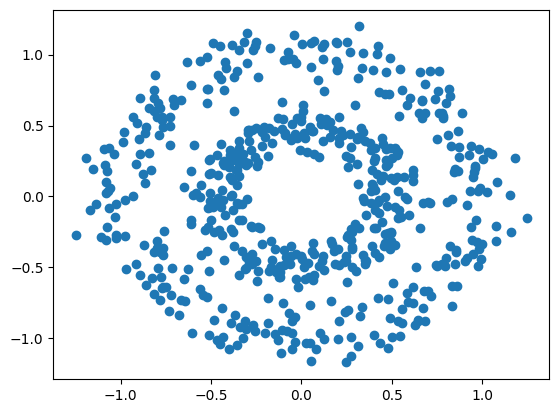

In [3]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [4]:
"""
Clase dedicada a las capas de una red neuronal
"""


class NeuralLayer:
    def __init__(self, n_perceptrons, edges, activation_functions):
        self.n_perceptrons = n_perceptrons
        self.edges = edges
        self.activation_functions = activation_functions
        # Para simplificar un poco el desarrollo, utilizaremos valores aleatorios para el peso
        self.weights = np.random.rand(edges, n_perceptrons) * 2 - 1
        self.slopes = np.random.rand(1, n_perceptrons) * 2 - 1

    def set_weights(self, weights):
        self.weights = weights

    def set_slopes(self, slopes):
        self.slopes = slopes

### Definir la estructura de las funciones de activación

In [5]:
"""
Para este apartado utilizaremos la sigmoidea --> (1 / 1 + e ^ -x), esta función es la que se aplica en el Forward Pass
Para el backpropagation se utiliza la derivada de esta función.

lambda parameter_1, parameter_2, ... , parameter_n: operations (parameter_1 + parameter_2) 
"""
sigmoide = (
    lambda x: 1.0 / (1.0 + np.e ** (-x)),
    lambda x: x * (1.0 - x)
)

### Definimos la topología de nuestra red

In [9]:
parameters = 2
result = 1
topology = [parameters, 3, 4, 2 , result]

### Definimos una función de pérdida

In [7]:
sqr_mean_error = (
    lambda predicted_y, real_y: np.mean((predicted_y - real_y) ** 2),
    lambda predicted_y, real_y: predicted_y - real_y
)

### Inicializamos la red neuronal

In [8]:
def init_neural_network(topology, activation_functions):
    neural_network = []
    for index in range(topology[:-1]):
        neural_network.append(NeuralLayer(
            edges=topology[index + 1],
            n_perceptrons=topology[index],
            activation_functions=activation_functions
        ))
    return neural_network

### Entrenamos nuestra red neuronal

In [ ]:
def fit(data_x, data_y, neural_network, loss_function, learning_rate=0.5):
    # Definir una estructura de salida
    #           0       1        0->datos previos 1-> salida
    output = [(None, data_x)]
    # Recorrer las capas de la red neuronal
    for index in enumerate(neural_network):
        # Definir las operaciones del Forward pass
        # En otras palabras aplicamos la suma producto de los datos de entrada por sus pesos y lo pasamos a la unión sumadora.
        # Dicho de otra forma, aplicamos una multiplicación matricial (n x m)(m x o) --> (600, 2)(2, 10)
        weigth_sum = output[-1][1] @ neural_network[index].weights + neural_network[index].slopes
        # Los valores obtenidos de la unión sumadora, pasan a la función de activación
        # sigmoide[0](weights)
        activated = np.vectorize(neural_network[index].activation_functions[0](weigth_sum))
        output.append((weigth_sum, activated))
    # Ahora aplicamos backpropagation
    deltas = []
    for position in reversed(range(0, len(neural_network))):
        activated = output[position + 1][1]
        if(position == len(neural_network) - 1):
            deltas.insert(0, loss_function[1](activated, data_y) * neural_network[position].activation_functions[1](activated))
        else:
            deltas.insert(0, deltas[0] @ weight_temp.T * neural_network[position].activation_functions[1](activated))
        weight_temp = neural_network[position].weigths